In [128]:
 
import numpy as np

data = np.loadtxt("/Users/nshelton/My project/out_jump.txt")

print(data.dtype)

maxframe = int(data[:, 0].max())
print(maxframe, "frames")

frames = [{} for i in range(maxframe+1) ]



for row in data:
    frame = int(row[0])
    joint = int(row[1])
    xyz = row[2:]
    frames[frame][joint] = xyz


float64
923 frames


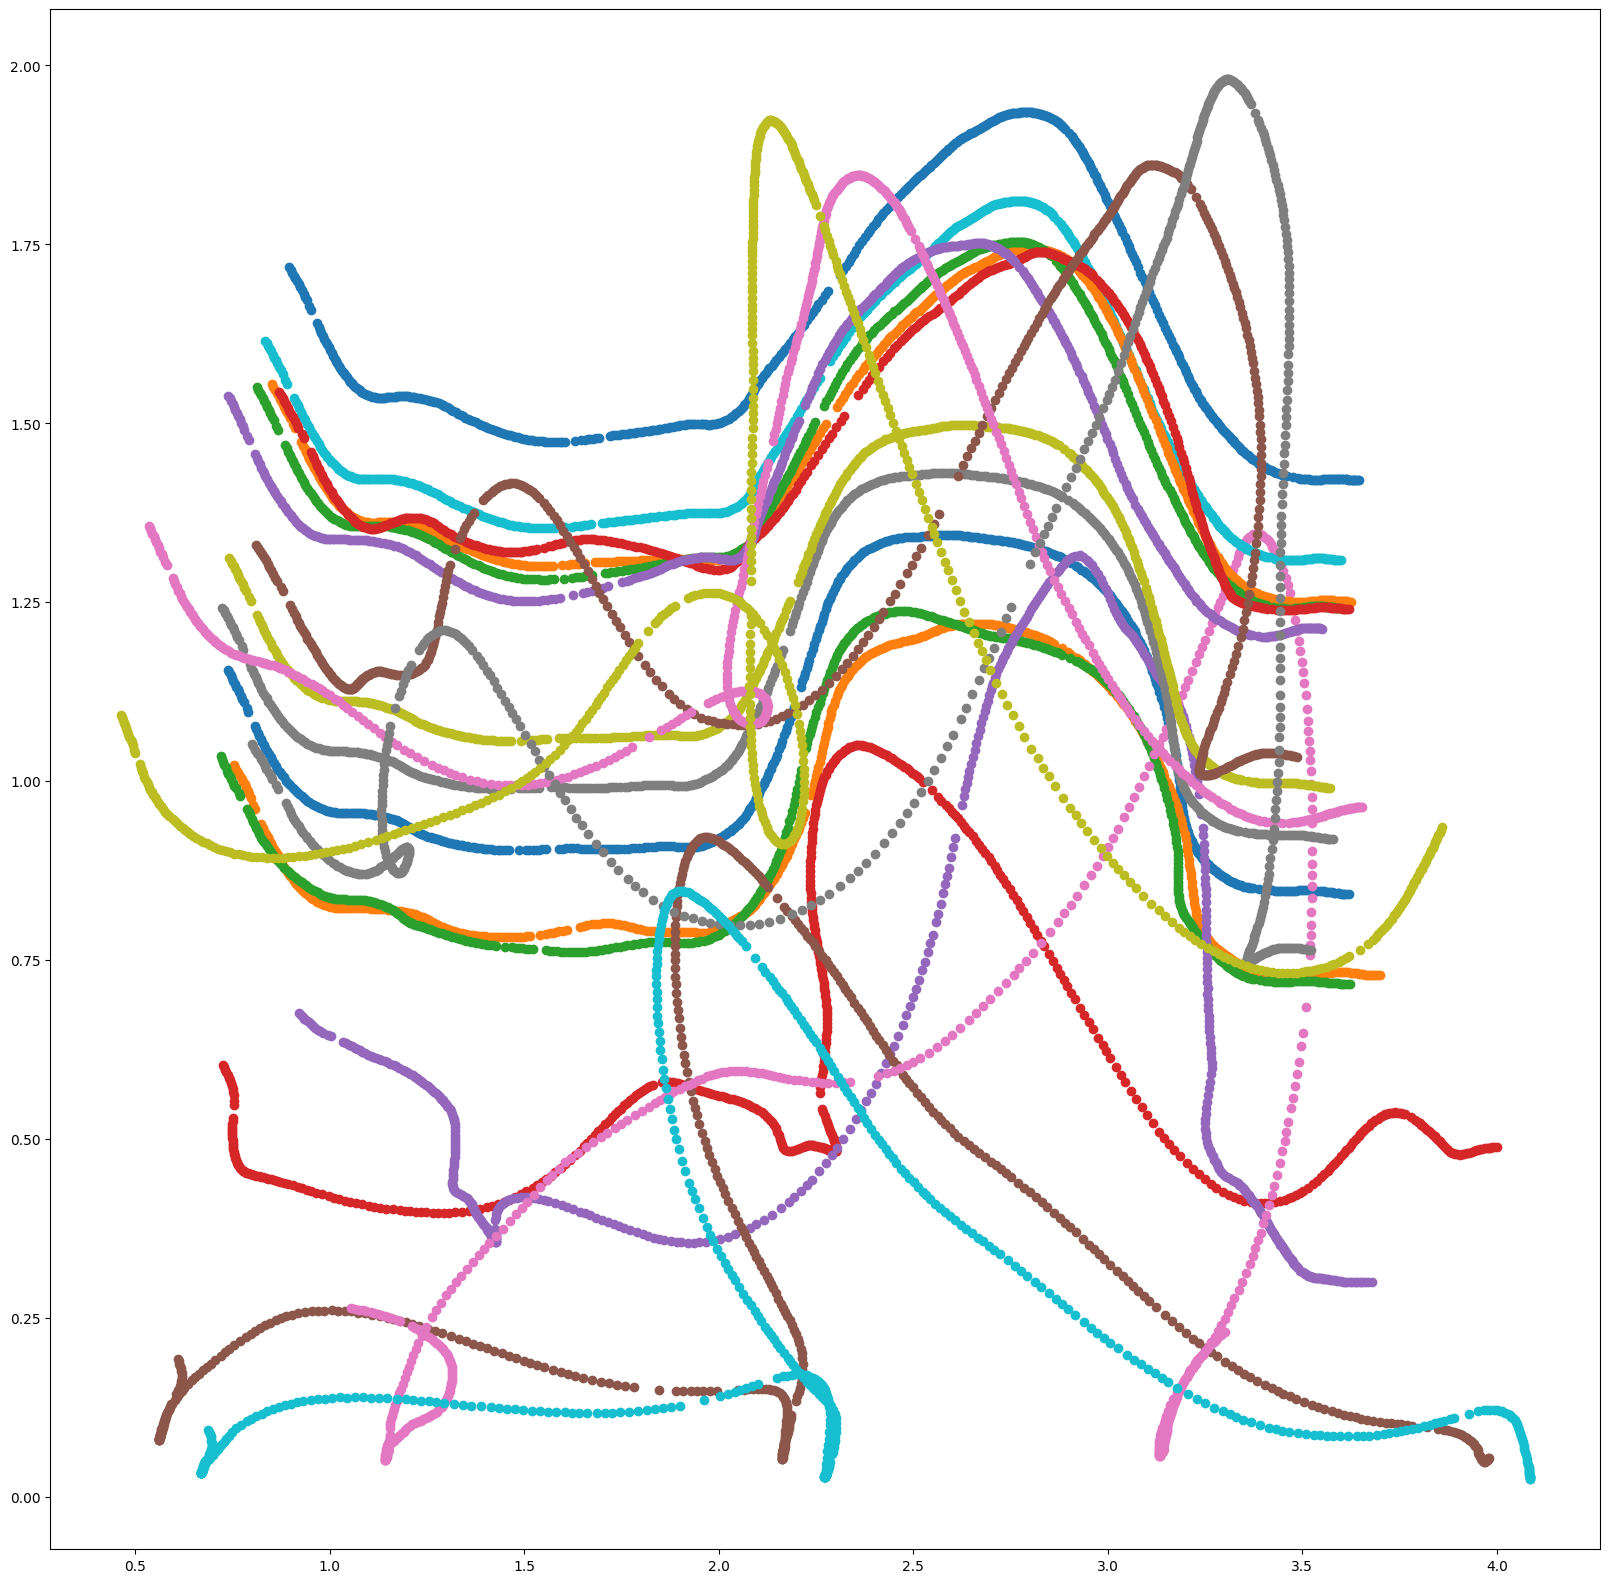

In [154]:
import matplotlib.pyplot as plt

points = []
plt.figure(figsize=(20,20))

for joint_idx in range(20):

    joint = np.array([frame[joint_idx] for frame in frames])

    joint = joint[380:, :]



    # plt.plot(joint[:,2] + joint[:,1] , joint[:,1] + joint[:,0])

    
    plt.scatter(joint[:,2]  , joint[:,1])
    
    points.append(joint[:,[2,1]])



In [155]:
import cv2 
import numpy as np

upscale = 10
def plotPaths(paths):
    img = np.ones((297 * upscale, 420 * upscale, 3), np.uint8) * 255

    for path in paths :
        for i in range(len(path)-1):
            a = (round(path[i][0]* upscale) , round(path[i][1]* upscale) )
            b = (round(path[i+1][0]* upscale) , round(path[i+1][1]* upscale) )
            cv2.line(img, a, b, (0,0,0), 1, cv2.LINE_AA)

    cv2.imwrite("render.png", img)



def circle_path(pos, radius, num_points=6):
    angles = np.linspace(0, 2 * np.pi, num_points)
    path = radius * np.array([np.cos(angles), np.sin(angles)]).T + pos;
    return np.array(path)

 

 
scaled_paths = [(p * 50) + [10, 100] for p in points]



plotPaths(scaled_paths)


In [125]:
 
import json
import uuid

projects_folder = "/Users/nshelton/Hephaestus/projects"

def writePlot(paths):
    dictionary = {
        "created_time": "4/7/2024 4:42:27 PM",
        "modified_time": "4/7/2024 6:27:36 PM",
        "camera_position": [100, 100],
        "zoom": 100.702,
        "aspect": 0.563,
        "dom_element": {},
        "plot_models": [],
    }

    dictionary["plot_models"].append(
        {
            "position": {"x": 0, "y": 0},
            "paths": np.array(paths).tolist(),
            "scale": 0.1,
            "id": str(uuid.uuid4()),
            "state": "none",
        }
    )
    

    with open(projects_folder + "/phantom_lines_jump.json", "w") as outfile:
        json.dump(dictionary, outfile)



writePlot(scaled_paths)

